In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [10]:
# Global variables
BNB_BLUE = '#7F7FFF'
BNB_RED = '#FF4C4C'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

In [11]:
# Read in the listings data 
listings = pd.read_csv('/Users/xynazog/FML/listings_NYC.csv', delimiter=',')

# View feature list
print (listings.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about' 'host_response_time'
 'host_response_rate' 'host_acceptance_rate' 'host_is_superhost'
 'host_thumbnail_url' 'host_picture_url' 'host_neighbourhood'
 'host_listings_count' 'host_total_listings_count' 'host_verifications'
 'host_has_profile_pic' 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet' 'price'
 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_included

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# Unsuppress Output
pd.options.display.max_columns = 5

# Split into predictor and response
y = listings[['price']]

# Append price at the end of the listings table
del listings['price']
listings = listings.join(y)

# Show listings dataframe
print ('Number of entries: ', listings.shape[0])
print ('Number of features: ', listings.shape[1] - 1)
listings.head(n = 3)

Number of entries:  44317
Number of features:  95


,id,listing_url,...,reviews_per_month,price
0,18461891,https://www.airbnb.com/rooms/18461891,...,NaN,$110.00
1,20702398,https://www.airbnb.com/rooms/20702398,...,2.00,$50.00
2,6627449,https://www.airbnb.com/rooms/6627449,...,0.77,$125.00


In [13]:
# plot_hist
# 
# Function to plot histograms
# Input: n (integer for subplots)
#        titles (list of titles)
#        ranges (list of values)
# Output: None
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= BNB_RED, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

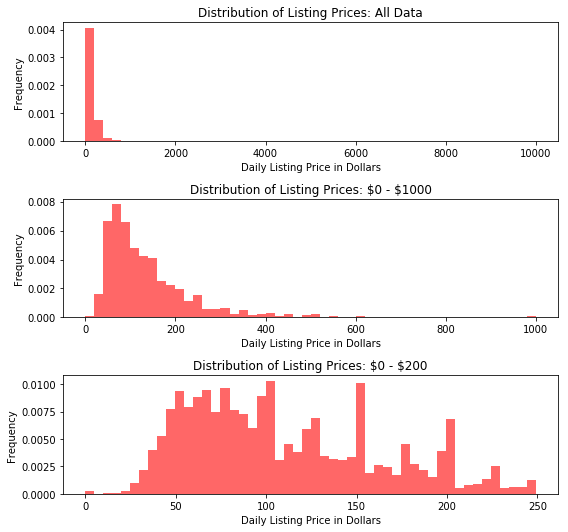

In [14]:
# Visualize price table, changing them to floats and replacing the commas with a blank
prices = listings['price'].apply(lambda s: float(s[1:].replace(',','')))

# Plot histograms of price distribution
plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$200'], [prices, prices[prices <= 1000], prices[prices < 250]])

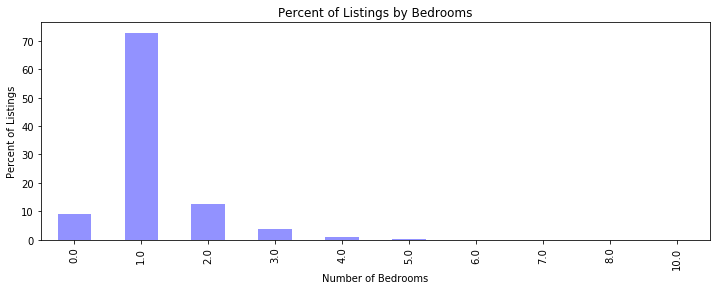

Percent of 1 Bedroom Listings: %72.93


In [15]:
# Get frequency of bedroom number for listings
bedrooms_counts = Counter(listings.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 44317) * 100

# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 4), color = BNB_BLUE, alpha = 0.85)
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Percent of Listings")
ax.set_title('Percent of Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))

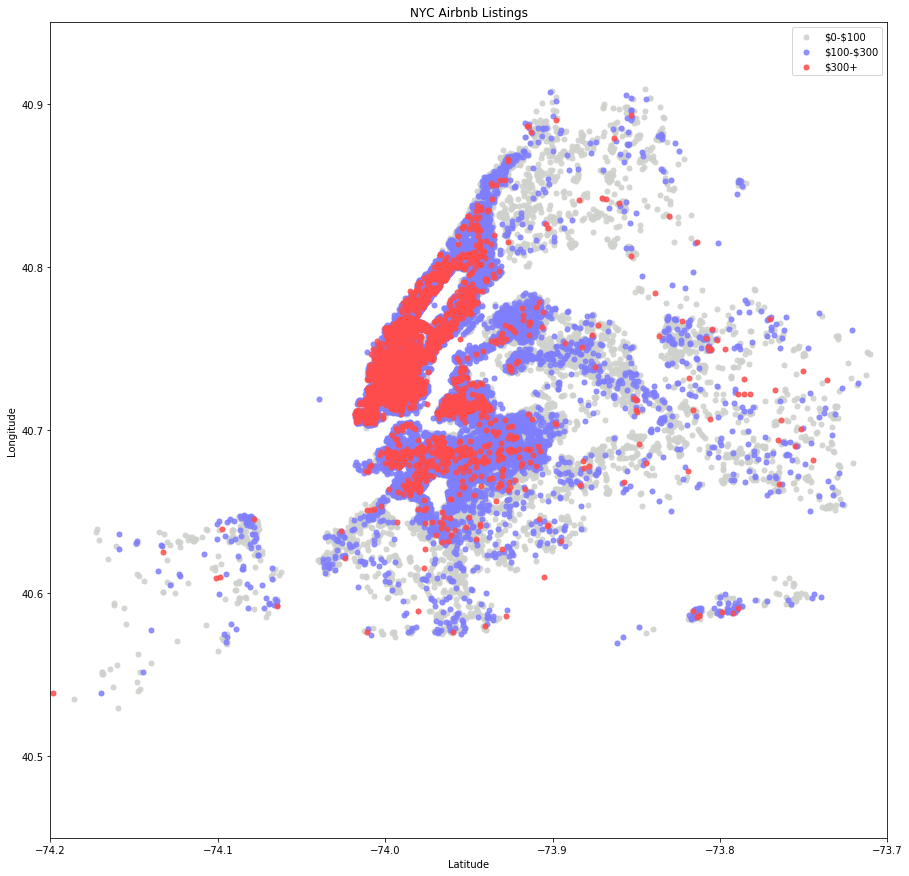

In [16]:
# Outline price buckets
intervals = [0,100,300, 10000]
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(listings[(prices > intervals[i]) & (prices < intervals[i+1])])

colors = [BNB_LIGHT_GRAY, BNB_BLUE, BNB_RED]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(15, 15))
for i in range(0, len(buckets)):
    plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('NYC Airbnb Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(labels=leg_labels, loc = 'best')
plt.xlim(-74.2,-73.7)
plt.ylim(40.45,40.95)

plt.show()